In [1]:
import ROOT
import numpy as np

def checkRootData(fileName, treeName, branchName):
    try:
        file = ROOT.TFile.Open(fileName)

        # Check if file is open
        if not file or file.IsZombie():
            print("File is Zombie")
            return False

        # Check if tree exists
        if not file.Get(treeName):
            print("Tree does not exist")
            return False

        tree = file.Get(treeName)

        # Check if branch exists
        if not tree.GetBranch(branchName):
            print("Branch name does not exist")
            return False

        branch = tree.GetBranch(branchName)

        # Check if branch is readable
        value = np.zeros(1, dtype=np.float64)
        branch.SetAddress(value)

        if branch.GetEntry(0) < 0:
            print("Branch is not readable")
            return False

        file.Close()

        return True

    except:
        print("An error occurred while checking root data")
        return False


Welcome to JupyROOT 6.26/10


In [34]:
def readRootBranch(fileName, treeName, branchName):
    print("fileName:", fileName)

    data = []

    if checkRootData(fileName, treeName, branchName):
        print(checkRootData(fileName, treeName, branchName))
        file = ROOT.TFile.Open(fileName)
        tree = file.Get(treeName)
        branch = tree.GetBranch(branchName)

        value = array('d', [0.0])
        branch.SetAddress(value)

        for i in range(tree.GetEntries()):
            branch.GetEntry(i)
            data.append(value[0])

        file.Close()
    else:
        print("Something is wrong with the file!!!")
        print("Branch:", branchName)

    return data

In [31]:
import os
from os import path
from typing import List
from array import array

def readRootDataFromFolder(folder, treeName, branchName):
    data = []

    # Open folder
    if os.path.isdir(folder):
        # Read all files in folder
        for file_name in os.listdir(folder):
            file_path = os.path.join(folder, file_name)
            # Skip directories
            if os.path.isdir(file_path):
                continue

            # Read data from file
            file_data = readRootBranch(file_path, treeName, branchName)
            data.extend(file_data)

    return data


In [4]:
folder="../TierIIData/2023_02/Final_NSGAII_375x3"
treeName1="EndOfEvent"
branchName1="fPrimaryZ"
treeName2="EndOfEvent"
branchName2="fphL"
treeName3="EndOfEvent"
branchName3="fphR"
plotName="EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_",
xMin=-29
xMax=29
yMin=0
yMax=6000
saveFolder="CSV/"

In [23]:
folder="../TierIIData/2023_02/Rst_GC3_Muon_23-02-09v2"

# Open the ROOT file
files=os.listdir(folder)
file_path = os.path.join(folder, files[0])

root_file = ROOT.TFile(file_path)
treeName1="EndOfEvent"

# Get the tree from the ROOT file
tree = root_file.Get(treeName1)

# Loop over all branches in the tree
for branch in tree.GetListOfBranches():
    branch_name = branch.GetName()
    print(branch_name)

# Close the ROOT file
root_file.Close()

fEdep
fPhot
fHits
fPDE
fLOapprox
fPrimaryX
fPrimaryZ
fGlueL
fResinL
fDetXpos
fDetYpos
fDetXpos2
fDetYpos2
fCrossTalkCount
fCrossTalkMev
fTiming
fphL
fphR
fLC
fevt


In [27]:
file_data = readRootBranch(file_path, treeName1, "fEdep")
file_data

fileName: ../TierIIData/2023_02/Rst_GC3_Muon_23-02-09v2/Rst_GC3_Muon_0_513_184_101292_184_0.root


[2.5902145953084257,
 3.749076727147374,
 2.6437225847334385,
 2.3893669309279364,
 3.5919099626560023]

In [29]:
checkRootData(file_path, treeName1, "fEdep")

True

Reading X data
3000
3000
6000
55
[-28.472727272727276, -27.41818181818182, -26.363636363636367, -25.30909090909091, -24.254545454545454, -23.200000000000003, -22.145454545454548, -21.090909090909093, -20.03636363636364, -18.981818181818188, -17.92727272727273, -16.872727272727275, -15.818181818181822, -14.763636363636367, -13.709090909090913, -12.654545454545456, -11.600000000000003, -10.545454545454549, -9.490909090909096, -8.436363636363637, -7.381818181818184, -6.32727272727273, -5.272727272727276, -4.218181818181822, -3.163636363636368, -2.1090909090909142, -1.0545454545454604, -6.613633252161577e-15, 1.054545454545451, 2.1090909090909045, 3.163636363636362, 4.218181818181815, 5.272727272727269, 6.327272727272723, 7.3818181818181765, 8.43636363636363, 9.490909090909085, 10.545454545454538, 11.6, 12.654545454545453, 13.709090909090907, 14.76363636363636, 15.818181818181815, 16.872727272727268, 17.927272727272722, 18.981818181818177, 20.03636363636363, 21.09090909090909, 22.145454545

/home/greales/miniconda3/envs/rootenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/greales/miniconda3/envs/rootenv/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


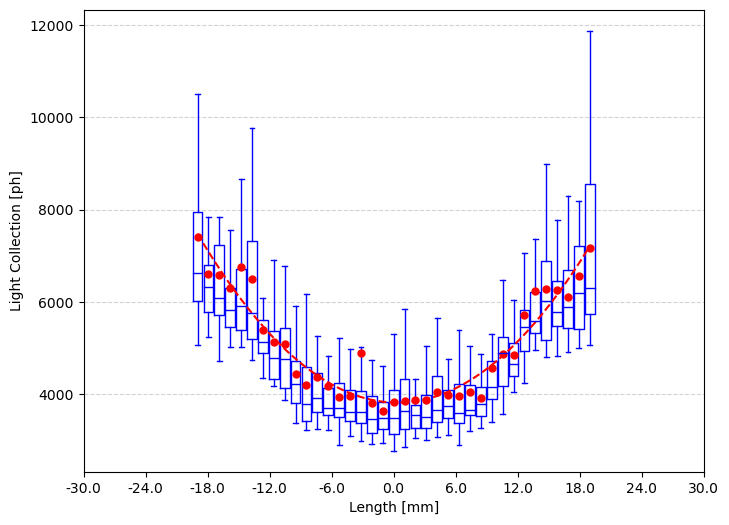

In [114]:
import math
from typing import List
import contextlib
import io
import matplotlib.pyplot as plt


folder="../TierIIData/2023_02/Final_NSGAII_375x3"
#folder="../TierIIData/2023_02/Rst_GC3_Muon_23-02-09v2"
#folder="../TierIIData/2023_02/Rst_FL_Muon_23-02-10_SiPM375"
#folder="../TierIIData/2023_02/Rst_FL_Muon_23-02-09v2"

treeName1="EndOfEvent"
branchName1="fPrimaryZ"
treeName2="EndOfEvent"
branchName2="fphL"
treeName3="EndOfEvent"
branchName3="fphR"
plotName="EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_",
xMin=-29
xMax=29
yMin=0
yMax=6000
saveFolder="CSV/"
treeName3="EndOfEvent"
branchName4="fDdep",
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
#ax.set_ylim(2000, 12000)

# Read data from root file

print("Reading X data")
with contextlib.redirect_stdout(io.StringIO()):
    data1 = readRootDataFromFolder(folder, treeName1, branchName1)
    data2 = readRootDataFromFolder(folder, treeName2, branchName2)
    data3 = readRootDataFromFolder(folder, treeName3, branchName3)
    #edep = readRootDataFromFolder(folder, treeName1, "fEdep")

print(len (data1))
print(len(data2))
print(len(edep))

n = int(np.ceil(np.sqrt(len(data1))))  # Number of ranges
print(n)
range_size = xMax * 2 / n
import matplotlib.pyplot as plt

# Create a list to store the data within each range
data_in_ranges = []
box_positions = []
box_widths = []
# Iterate over each range and extract the data within it
for i in range(n):
    range_min = xMin / 1000 + i * range_size / 1000
    range_max = range_min + range_size / 1000
    values_in_range = []
    for j in range(len(data1)):
        if range_min <= data1[j] < range_max:
            if data2[j] > 0 and data3[j] > 0:
                #if edep[j]>0.1:
                    values_in_range.append((data3[j] + data2[j]) / 2 )
    data_in_ranges.append(values_in_range)
    # Calculate the box position and width
    box_position = (range_min + range_max) / 2*1000
    box_width = 0.9 * (range_max - range_min)*1000
    box_positions.append(box_position)
    box_widths.append(box_width)


# Set the y-axis limits
print(box_positions)

# Plot the box plot for each range
boxplot=ax.boxplot(data_in_ranges, positions=box_positions, widths=box_widths, showfliers=False,
          patch_artist=False,  # Set patch_artist to False
                     whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                     medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                     markerfacecolor='black'), whis=1.5)



# Set the y-axis label
ax.set_ylabel("Value")

# Set the plot title
ax.set_title("Box Plot of Data in Each Range")
# Set the x-axis limits
ax.set_xlim(-30, 30)

# Round the x-axis tick labels to the first decimal place
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
    # Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')
# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')

# Customize the color of all boxes
for box in boxplot['boxes']:
    box.set_color('blue')

import matplotlib.ticker as mticker

# Set the number of divisions on the x-axis
num_divisions = 10  # Choose the desired number of divisions
ax.xaxis.set_major_locator(mticker.MaxNLocator(num_divisions))

# Calculate the mean of each box
box_means = [np.mean(data) for data in data_in_ranges]
ax.plot(box_positions, box_means, 'ro', markersize=5)

# Remove the title
ax.set_title('')

x=box_positions
y=box_means
x_filtered = [x_val for x_val, y_val in zip(x, y) if not math.isnan(y_val)]
y_filtered = [y_val for y_val in y if not math.isnan(y_val)]

#print(x)
#print(y)
#print(x_filtered)
#print(y_filtered)

# Add a parabolic fit to the mean values
x_fit = np.linspace(min(x_filtered), max(x_filtered), 100)
y_fit = np.polyval(np.polyfit(x_filtered, y_filtered, 2), x_fit)
ax.plot(x_fit, y_fit, color='red', linestyle='--')
#print(x_fit)
#print(y_fit)

# Save the figure as a PDF
output_filename = 'CSV/GC3_ROOT_6200.pdf'
plt.savefig(output_filename, format='pdf')
# Show the plot
plt.show()


Reading X data
6000
6000
6000
[-28.275000000000002, -26.825000000000003, -25.375, -23.925, -22.475, -21.025000000000002, -19.575000000000003, -18.125, -16.675, -15.225000000000003, -13.775, -12.325000000000003, -10.875000000000004, -9.425000000000002, -7.975, -6.525000000000003, -5.075000000000003, -3.625000000000003, -2.1750000000000034, -0.725, 0.725, 2.1749999999999963, 3.6249999999999964, 5.075000000000003, 6.524999999999996, 7.974999999999996, 9.424999999999995, 10.874999999999996, 12.325000000000003, 13.774999999999995, 15.224999999999996, 16.674999999999997, 18.124999999999996, 19.575000000000003, 21.024999999999995, 22.475, 23.924999999999994, 25.374999999999996, 26.825000000000003, 28.274999999999995]
[-28.275000000000002, -26.825000000000003, -25.375, -23.925, -22.475, -21.025000000000002, -19.575000000000003, -18.125, -16.675, -15.225000000000003, -13.775, -12.325000000000003, -10.875000000000004, -9.425000000000002, -7.975, -6.525000000000003, -5.075000000000003, -3.6250000

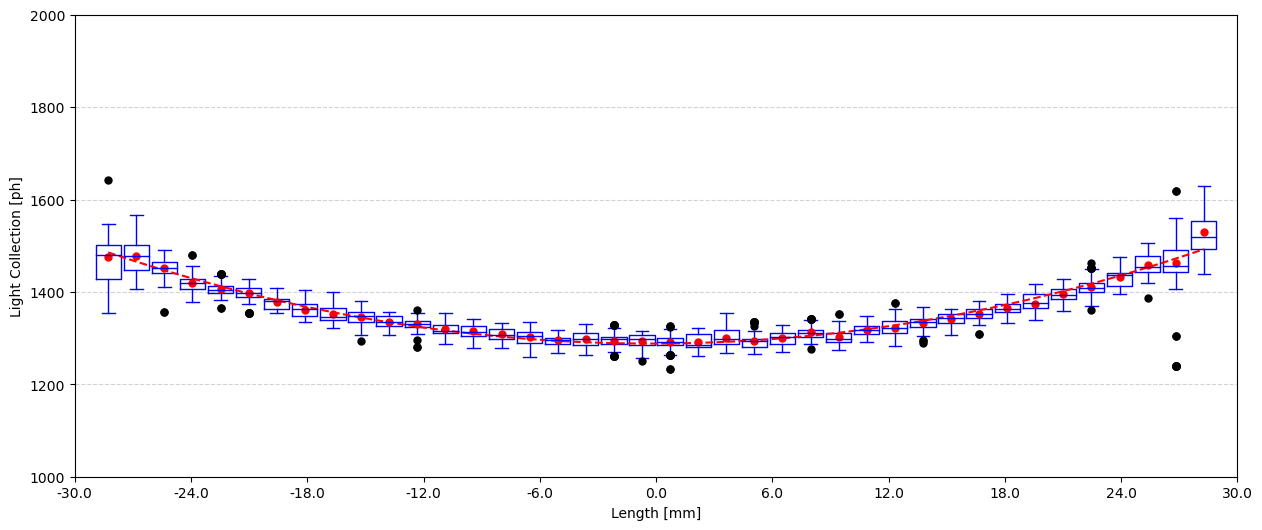

[1476.4927044349038, 1477.4607798311192, 1451.5101886902924, 1420.107746360475, 1405.9306849412271, 1397.8741893036317, 1377.529565535813, 1361.693642303318, 1351.4919526197405, 1345.8609431686077, 1334.925723966615, 1329.9137241297392, 1319.314080350188, 1314.458219401147, 1308.247881110248, 1302.04954457787, 1295.7377280210148, 1297.5919397311443, 1293.9343692264158, 1293.5576688415879, 1291.7127846346768, 1292.0230721439177, 1299.7936995617642, 1292.9239393048915, 1299.6579383620617, 1313.2306576584988, 1302.4169749024795, 1316.7676553258934, 1322.111536952335, 1333.2928466063977, 1341.5538473125046, 1352.7665083910533, 1365.9930676577505, 1373.059425142606, 1394.9909257512402, 1410.8953097520337, 1431.6492911200091, 1459.2984072261168, 1463.1499060545577, 1530.5205633437174]
[1485.54406491 1477.58429853 1469.78839846 1462.15636469 1454.68819723
 1447.38389608 1440.24346124 1433.2668927  1426.45419048 1419.80535456
 1413.32038495 1406.99928165 1400.84204465 1394.84867397 1389.019169

In [108]:
import math
from typing import List
import contextlib
import io
import matplotlib.pyplot as plt


folder="../TierIIData/2023_02/Final_NSGAII_375x3"
folder="../TierIIData/2023_02/Rst_GC3_Muon_23-02-09v2"
#folder="../TierIIData/2023_02/Rst_FL_Muon_23-02-10_SiPM375"
folder="../TierIIData/2023_02/Rst_FL_Muon_23-02-09v2"

treeName1="EndOfEvent"
branchName1="fPrimaryZ"
treeName2="EndOfEvent"
branchName2="fphL"
treeName3="EndOfEvent"
branchName3="fphR"
plotName="EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_",
xMin=-29
xMax=29
yMin=0
yMax=6000
saveFolder="CSV/"
treeName3="EndOfEvent"
branchName4="fDdep",
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_ylim(1000, 2000)

# Read data from root file

print("Reading X data")
with contextlib.redirect_stdout(io.StringIO()):
    data1 = readRootDataFromFolder(folder, treeName1, branchName1)
    data2 = readRootDataFromFolder(folder, treeName2, branchName2)
    data3 = readRootDataFromFolder(folder, treeName3, branchName3)
    edep = readRootDataFromFolder(folder, treeName1, "fEdep")

print(len (data1))
print(len(data2))
print(len(edep))

n = 40  # Number of ranges
range_size = xMax * 2 / n
import matplotlib.pyplot as plt

# Create a list to store the data within each range
data_in_ranges = []
box_positions = []
box_widths = []
# Iterate over each range and extract the data within it
for i in range(n):
    range_min = xMin / 1000 + i * range_size / 1000
    range_max = range_min + range_size / 1000
    values_in_range = []
    for j in range(len(data1)):
        if range_min <= data1[j] < range_max:
            if data2[j] > 0 and data3[j] > 0:
                if edep[j]>0:
                    values_in_range.append((data3[j] + data2[j]) / 2 / edep[j])
    data_in_ranges.append(values_in_range)
    # Calculate the box position and width
    box_position = (range_min + range_max) / 2*1000
    box_width = 0.9 * (range_max - range_min)*1000
    box_positions.append(box_position)
    box_widths.append(box_width)


# Set the y-axis limits
print(box_positions)

# Plot the box plot for each range
boxplot=ax.boxplot(data_in_ranges, positions=box_positions, widths=box_widths, showfliers=True,
          patch_artist=False,  # Set patch_artist to False
                     whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                     medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                     markerfacecolor='black'), whis=1.5)



# Set the y-axis label
ax.set_ylabel("Value")

# Set the plot title
ax.set_title("Box Plot of Data in Each Range")
# Set the x-axis limits
ax.set_xlim(-30, 30)

# Round the x-axis tick labels to the first decimal place
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
    # Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')
# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')

# Customize the color of all boxes
for box in boxplot['boxes']:
    box.set_color('blue')

import matplotlib.ticker as mticker

# Set the number of divisions on the x-axis
num_divisions = 10  # Choose the desired number of divisions
ax.xaxis.set_major_locator(mticker.MaxNLocator(num_divisions))

# Calculate the mean of each box
box_means = [np.mean(data) for data in data_in_ranges]
ax.plot(box_positions, box_means, 'ro', markersize=5)

# Remove the title
ax.set_title('')

x=box_positions
y=box_means
x_filtered = [x_val for x_val, y_val in zip(x, y) if not math.isnan(y_val)]
y_filtered = [y_val for y_val in y if not math.isnan(y_val)]

print(x)
print(y)
print(x_filtered)
print(y_filtered)

# Add a parabolic fit to the mean values
x_fit = np.linspace(min(x_filtered), max(x_filtered), 100)
y_fit = np.polyval(np.polyfit(x_filtered, y_filtered, 2), x_fit)
ax.plot(x_fit, y_fit, color='red', linestyle='--')
print(x_fit)
print(y_fit)

# Save the figure as a PDF
output_filename = 'CSV/LC375_ROOT_LO.pdf'
plt.savefig(output_filename, format='pdf')
# Show the plot
plt.show()
print(box_means)
print(y_fit)

In [74]:
x = [1, 2, 3, 4, 5, 6]
y = [1.0, 2.0, float('nan'), 4.0, float('nan'), 6.0]

x=box_positions
y=box_means
x_filtered = [x_val for x_val, y_val in zip(x, y) if not math.isnan(y_val)]
y_filtered = [y_val for y_val in y if not math.isnan(y_val)]

print(x_filtered)
print(y_filtered)

# Add a parabolic fit to the mean values
x_fit = np.linspace(min(x_filtered), max(x_filtered), 100)
y_fit = np.polyval(np.polyfit(y_filtered, x_filtered, 2), x_fit)
ax.plot(x_fit, y_fit, color='red', linestyle='--')
print(x_fit)
print(y_fit)

[-18.85, -15.950000000000003, -13.05, -10.150000000000002, -7.249999999999999, -4.350000000000003, -1.4500000000000033, 1.45, 4.349999999999996, 7.2499999999999964, 10.149999999999995, 13.050000000000002, 15.949999999999996, 18.849999999999994]
[1598.5380821258627, 1715.2053466347086, 1879.419311897098, 1870.6434973293842, 1740.1036364606564, 1721.7719847346764, 1780.9283985807313, 1780.1979794069769, 1726.176224555261, 1733.854872859544, 1876.750787355729, 1866.8378674615476, 1713.446931150634, 1594.6695520035357]
[-18.85       -18.46919192 -18.08838384 -17.70757576 -17.32676768
 -16.9459596  -16.56515152 -16.18434343 -15.80353535 -15.42272727
 -15.04191919 -14.66111111 -14.28030303 -13.89949495 -13.51868687
 -13.13787879 -12.75707071 -12.37626263 -11.99545455 -11.61464646
 -11.23383838 -10.8530303  -10.47222222 -10.09141414  -9.71060606
  -9.32979798  -8.9489899   -8.56818182  -8.18737374  -7.80656566
  -7.42575758  -7.04494949  -6.66414141  -6.28333333  -5.90252525
  -5.52171717  -5

[38429.55519062659, 1384.7897956973384, 6397.132049465755, 8531.24492870294, 2991.7933284141714, 21766.08117810676, 14300.476077028114, 110119.48234511478, 40678.816067863176, 9806.869979853103, 4190.197117910581, 24630.81310781033, 14138.512320670765, 25700.763304194534, 15264.027654360301, 7053.647674750598, 6927.387797468518, 7163.173079615104, 40156.80805801561, 6077.075005131675]


In [86]:
import csv

# Calculate the statistics for each range
box_data = []
for values_in_range in data_in_ranges:
    if len(values_in_range) > 0:
        q1 = np.percentile(values_in_range, 25)
        q2 = np.percentile(values_in_range, 50)
        q3 = np.percentile(values_in_range, 75)
        minimum = min(values_in_range)
        maximum = max(values_in_range)
        mean = np.mean(values_in_range)
    else:
        q1 = q2 = q3 = minimum = maximum = mean = None
    box_data.append((minimum, q1, q2, q3, maximum, mean))

# Write the data to a CSV file
csv_filename = 'CSV/box_plot_data.csv'
with open(csv_filename, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Minimum', 'Q1', 'Q2 (Median)', 'Q3', 'Maximum', 'Mean'])
    writer.writerows(box_data)
    
print(f"Box plot data saved to {csv_filename}")

Box plot data saved to CSV/box_plot_data.csv


Reading X data
[-27.55, -24.650000000000002, -21.750000000000004, -18.85, -15.950000000000003, -13.05, -10.150000000000002, -7.249999999999999, -4.350000000000003, -1.4500000000000033, 1.45, 4.349999999999996, 7.2499999999999964, 10.149999999999995, 13.050000000000002, 15.949999999999996, 18.849999999999994, 21.749999999999996, 24.649999999999995, 27.55]
[-19.000000000000004, -17.0, -15.0, -13.000000000000002, -11.0, -9.000000000000002, -7.0, -5.0, -3.0, -1.0000000000000018, 1.0, 2.9999999999999982, 5.0, 6.999999999999998, 9.000000000000002, 11.0, 13.000000000000002, 15.000000000000002, 16.999999999999993, 18.999999999999996]


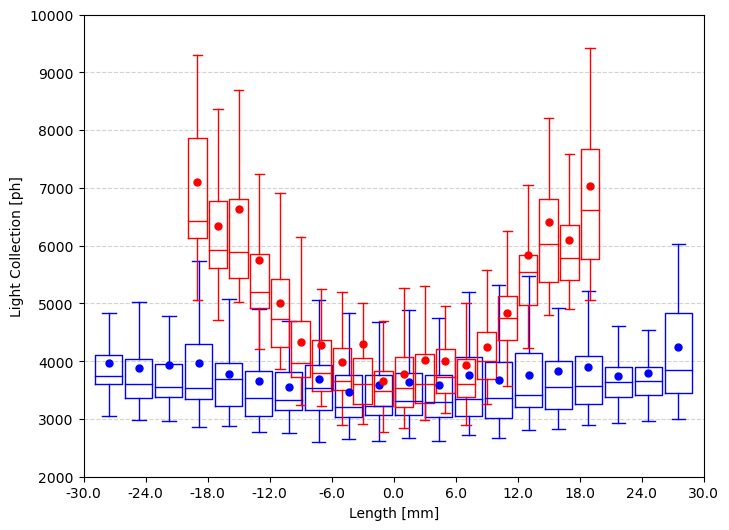

Error in <TFile::Init>: file ../TierIIData/2023_02/Rst_GC3_Muon_23-02-09v2/Rst_GC3_Muon_0_513_591_101293_591_0.root has an incorrect header length (260) or incorrect end of file length (242)
Error in <TFile::Init>: file ../TierIIData/2023_02/Rst_GC3_Muon_23-02-09v2/Rst_GC3_Muon_0_513_591_101293_591_0.root has an incorrect header length (260) or incorrect end of file length (242)
Error in <TFile::Init>: file ../TierIIData/2023_02/Rst_GC3_Muon_23-02-09v2/Rst_GC3_Muon_0_513_591_101293_591_0.root has an incorrect header length (260) or incorrect end of file length (242)


In [79]:
import math
from typing import List
import contextlib
import io

folder1="../TierIIData/2023_02/Final_NSGAII_375x3"
folder="../TierIIData/2023_02/Rst_GC3_Muon_23-02-09v2"
#folder1="../TierIIData/2023_02/Rst_GC3_Muon_23-02-09v2"

#folder="../TierIIData/2023_02/Rst_FL_Muon_23-02-10_SiPM375"

treeName1="EndOfEvent"
branchName1="fPrimaryZ"
treeName2="EndOfEvent"
branchName2="fphL"
treeName3="EndOfEvent"
branchName3="fphR"
plotName="EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_",
xMin=-29
xMax=29
yMin=0
yMax=6000
saveFolder="CSV/"

# Read data from root file
print("Reading X data")
with contextlib.redirect_stdout(io.StringIO()):
    data1 = readRootDataFromFolder(folder, treeName1, branchName1)
    data2 = readRootDataFromFolder(folder, treeName2, branchName2)
    data3 = readRootDataFromFolder(folder, treeName3, branchName3)
    
with contextlib.redirect_stdout(io.StringIO()):
    data11 = readRootDataFromFolder(folder1, treeName1, branchName1)
    data21 = readRootDataFromFolder(folder1, treeName2, branchName2)
    data31 = readRootDataFromFolder(folder1, treeName3, branchName3)
    
n = 20  # Number of ranges
range_size = xMax * 2 / n
import matplotlib.pyplot as plt

# Create a list to store the data within each range
data_in_ranges = []
box_positions = []
box_widths = []
# Iterate over each range and extract the data within it
for i in range(n):
    range_min = xMin / 1000 + i * range_size / 1000
    range_max = range_min + range_size / 1000
    values_in_range = []
    for j in range(len(data1)):
        if range_min <= data1[j] < range_max:
            if data2[j] > 0 and data3[j] > 0:
                values_in_range.append((data3[j] + data2[j]) / 2)
    data_in_ranges.append(values_in_range)
    # Calculate the box position and width
    box_position = (range_min + range_max) / 2*1000
    box_width = 0.9 * (range_max - range_min)*1000
    box_positions.append(box_position)
    box_widths.append(box_width)

# Create a list to store the data within each range
data_in_ranges1 = []
box_positions1 = []
box_widths1 = []
range_size1 = 20 * 2 / n
# Iterate over each range and extract the data within it
for i in range(n):
    range_min1 = -20 / 1000 + i * range_size1 / 1000
    range_max1 = range_min1 + range_size1 / 1000
    values_in_range1 = []
    for j in range(len(data11)):
        if range_min1 <= data11[j] < range_max1:
            if data21[j] > 0 and data31[j] > 0:
                values_in_range1.append((data31[j] + data21[j]) / 2)
    data_in_ranges1.append(values_in_range1)
    # Calculate the box position and width
    box_position1 = (range_min1 + range_max1) / 2*1000
    box_width1 = 0.9 * (range_max1 - range_min1)*1000
    box_positions1.append(box_position1)
    box_widths1.append(box_width1)
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
# Set the y-axis limits
ax.set_ylim(2000, 10000)
print(box_positions)
print(box_positions1)

# Plot the box plot for each range
boxplot=ax.boxplot(data_in_ranges, positions=box_positions, widths=box_widths, showfliers=False,
          patch_artist=False,  # Set patch_artist to False
                     whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                     medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                     markerfacecolor='black'))
# Plot the box plot for each range
boxplot1=ax.boxplot(data_in_ranges1, positions=box_positions1, widths=box_widths1, showfliers=False,
          patch_artist=False,  # Set patch_artist to False
                     whiskerprops=dict(color='red'), capprops=dict(color='red'),
                     medianprops=dict(color='red'), flierprops=dict(marker='o', markersize=5,
                                                                     markerfacecolor='black'))


# Set the y-axis label
ax.set_ylabel("Value")

# Set the plot title
ax.set_title("Box Plot of Data in Each Range")
# Set the x-axis limits
ax.set_xlim(-30, 30)

# Round the x-axis tick labels to the first decimal place
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
    # Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')
# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')

# Customize the color of all boxes
for box in boxplot['boxes']:
    box.set_color('blue')
# Customize the color of all boxes
for box in boxplot1['boxes']:
    box.set_color('red')
import matplotlib.ticker as mticker

# Set the number of divisions on the x-axis
num_divisions = 10  # Choose the desired number of divisions
ax.xaxis.set_major_locator(mticker.MaxNLocator(num_divisions))

# Calculate the mean of each box
box_means = [np.mean(data) for data in data_in_ranges]
ax.plot(box_positions, box_means, 'bo', markersize=5)

# Calculate the mean of each box
box_means1 = [np.mean(data) for data in data_in_ranges1]
ax.plot(box_positions1, box_means1, 'ro', markersize=5)
# Remove the title
ax.set_title('')

# Save the figure as a PDF
output_filename = 'CSV/BOTH_ROOT.pdf'
plt.savefig(output_filename, format='pdf')

# Show the plot
plt.show()



In [65]:
values_in_range1[0]

IndexError: list index out of range

In [29]:
n = 20  # Number of ranges
range_size = xMax * 2 / n

Reading X data
fileName: ../TierIIData/2023_02/Final_NSGAII_375x3/SiPM_375x313_507_14_101306_14_0.root
fileName: ../TierIIData/2023_02/Final_NSGAII_375x3/SiPM_375x313_507_48_101306_48_0.root
fileName: ../TierIIData/2023_02/Final_NSGAII_375x3/SiPM_375x313_507_11_101306_11_0.root
fileName: ../TierIIData/2023_02/Final_NSGAII_375x3/SiPM_375x313_507_17_101306_17_0.root
fileName: ../TierIIData/2023_02/Final_NSGAII_375x3/SiPM_375x313_507_32_101306_32_0.root
fileName: ../TierIIData/2023_02/Final_NSGAII_375x3/SiPM_375x313_507_21_101306_21_0.root
fileName: ../TierIIData/2023_02/Final_NSGAII_375x3/SiPM_375x313_507_42_101306_42_0.root
fileName: ../TierIIData/2023_02/Final_NSGAII_375x3/SiPM_375x313_507_8_101306_8_0.root
fileName: ../TierIIData/2023_02/Final_NSGAII_375x3/SiPM_375x313_507_18_101306_18_0.root
fileName: ../TierIIData/2023_02/Final_NSGAII_375x3/SiPM_375x313_507_15_101306_15_0.root
fileName: ../TierIIData/2023_02/Final_NSGAII_375x3/SiPM_375x313_507_19_101306_19_0.root
fileName: ../TierII

[-27.55, -24.650000000000002, -21.750000000000004, -18.85, -15.950000000000003, -13.05, -10.150000000000002, -7.249999999999999, -4.350000000000003, -1.4500000000000033, 1.45, 4.349999999999996, 7.2499999999999964, 10.149999999999995, 13.050000000000002, 15.949999999999996, 18.849999999999994, 21.749999999999996, 24.649999999999995, 27.55]


/home/greales/miniconda3/envs/rootenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/greales/miniconda3/envs/rootenv/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


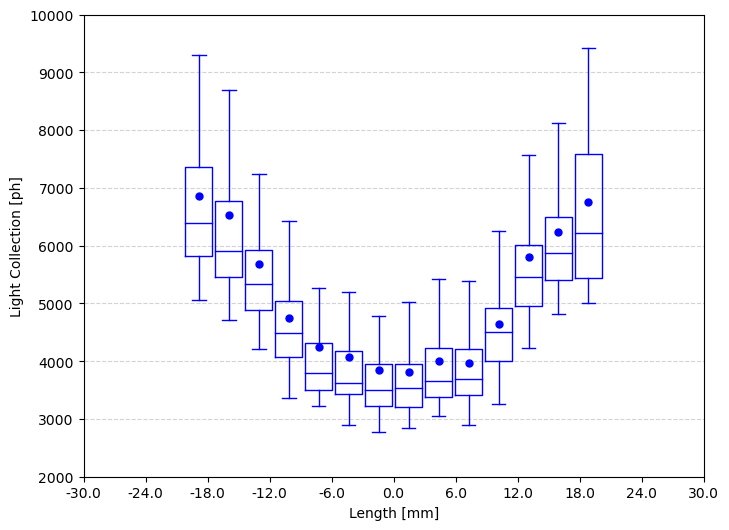

In [54]:
import matplotlib.pyplot as plt

# Create a list to store the data within each range
data_in_ranges = []

# Create a list to store the box positions
box_positions = []

# Create a list to store the box widths
box_widths = []

# Iterate over each range and extract the data within it
for i in range(n):
    range_min = xMin / 1000 + i * range_size / 1000
    range_max = range_min + range_size / 1000

    values_in_range = []

    for j in range(len(data1)):
        if range_min <= data1[j] < range_max:
            if data2[j] > 0 and data3[j] > 0:
                values_in_range.append((data3[j] + data2[j]) / 2)

    data_in_ranges.append(values_in_range)
    
    # Calculate the box position and width
    box_position = (range_min + range_max) / 2*1000
    box_width = 0.9 * (range_max - range_min)*1000
    
    box_positions.append(box_position)
    box_widths.append(box_width)

print(box_positions)
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
# Set the y-axis limits
ax.set_ylim(2000, 10000)

# Plot the box plot for each range
boxplot=ax.boxplot(data_in_ranges, positions=box_positions, widths=box_widths, showfliers=False,
          patch_artist=False,  # Set patch_artist to False
                     whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                     medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                     markerfacecolor='black'))

# Set the x-axis labels
xticklabels = [f"Range {i+1}" for i in range(n)]
ax.set_xticklabels(xticklabels)

# Set the y-axis label
ax.set_ylabel("Value")

# Set the plot title
ax.set_title("Box Plot of Data in Each Range")
# Set the x-axis limits
ax.set_xlim(-30, 30)

# Round the x-axis tick labels to the first decimal place
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
    # Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')
# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')

# Customize the color of all boxes
for box in boxplot['boxes']:
    box.set_color('blue')
    
import matplotlib.ticker as mticker

# Set the number of divisions on the x-axis
num_divisions = 10  # Choose the desired number of divisions
ax.xaxis.set_major_locator(mticker.MaxNLocator(num_divisions))

# Calculate the mean of each box
box_means = [np.mean(data) for data in data_in_ranges]
# Plot the box means with markers
ax.plot(box_positions, box_means, 'bo', markersize=5)
# Remove the title
ax.set_title('')

# Show the plot
plt.show()


In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
fnameGC3 = 'EndOfEvent_fPrimaryZ_vs_fLC_box_GC3__quartile_data'
fnameNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'

folder='CSV/'
data = pd.read_csv(folder+fnameGC3+'.csv')
data

,Range Min,Range Max,Lower Quartile,Median,Upper Quartile,Mean,Std,Min,Max
0,-0.0290,-2.610000e-02,3614.0,3740.0,4114.0,3962.92,645.680,3051.5,6041.0
1,-0.0261,-2.320000e-02,3371.5,3604.0,4035.5,3879.38,875.729,2981.0,7287.5
2,-0.0232,-2.030000e-02,3388.0,3566.0,4000.0,3942.01,1010.750,2957.5,8462.5
3,-0.0203,-1.740000e-02,3339.5,3543.5,4317.5,3976.15,1128.560,2858.0,11280.0
4,-0.0174,-1.450000e-02,3219.5,3693.5,3968.5,3771.32,778.182,2884.5,7540.5
5,-0.0145,-1.160000e-02,3060.0,3358.5,3841.0,3652.24,962.722,2774.5,8707.0
6,-0.0116,-8.700000e-03,3150.0,3333.0,3806.0,3561.74,679.759,2749.5,6608.0
7,-0.0087,-5.800000e-03,3161.0,3537.0,3937.5,3686.08,763.897,2601.5,7963.0
8,-0.0058,-2.900000e-03,3036.5,3201.0,3765.0,3463.17,733.198,3.0,7059.5
9,-0.0029,-3.469450e-18,3065.0,3229.5,3763.5,3584.30,977.421,2611.0,9304.5


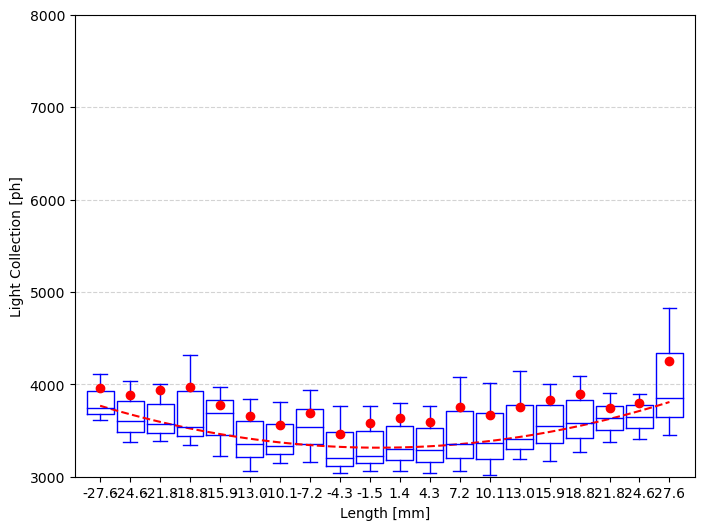

<Figure size 640x480 with 0 Axes>

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
fnameGC3='EndOfEvent_fPrimaryZ_vs_fLC_box_GC3_quartile_data'
fnameNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_FL_375x3_quartile_data'

folder='CSV/'
data = pd.read_csv(folder+fnameGC3+'.csv')

# Calculate the box positions
data['Position'] = (data['Range Max'] + data['Range Min']) / 2*1000
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
# Set the y-axis limits
ax.set_ylim(3000, 8000)

# Create boxplots for each row
box_data = [data.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
            for i in range(len(data))]
box_positions = data['Position'].tolist()
box_width = (29 * 2)*0.9 / len(data)  # Set the box width dynamically

boxplot = ax.boxplot(box_data, positions=box_positions, widths=box_width, 
patch_artist=False,  # Set patch_artist to False
                     whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                     medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                     markerfacecolor='black'))

# Set the x-axis limits
ax.set_xlim(-30, 30)


# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Box Plot')

# Add a parabolic fit to the mean values
x_fit = np.linspace(min(box_positions), max(box_positions), 100)
y_fit = np.polyval(np.polyfit(box_positions, data['Median'], 2), x_fit)
ax.plot(x_fit, y_fit, color='red', linestyle='--')

# Add a parabolic fit to the mean values
#x_fit_mean = np.linspace(min(box_positions), max(box_positions), 100)
#y_fit_mean = np.polyval(np.polyfit(box_positions, data['Mean'], 2), x_fit_mean)
#ax.plot(x_fit_mean, y_fit_mean, color='green', linestyle='--')

# Round the x-axis tick labels to the first decimal place
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))


    # Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')


# Calculate the mean of the boxes
mean_values = data['Mean'].to_list()

# Add the 'Mean' data to the plot
ax.plot(box_positions, mean_values, color='red', marker='o', linestyle='', linewidth=1, label='Mean')
    
# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')

# Customize the color of all boxes
for box in boxplot['boxes']:
    box.set_color('blue')

# Remove the title
ax.set_title('')

# Show the plot
plt.show()

plt.savefig('CSV/GC3_End.pdf',format='pdf')


In [102]:
plt.savefig(folder +fname+'.pdf')


<Figure size 640x480 with 0 Axes>

In [190]:
box_data

[[3614.0, 3740.0, 4114.0],
 [3371.5, 3604.0, 4035.5],
 [3388.0, 3566.0, 4000.0],
 [3339.5, 3543.5, 4317.5],
 [3219.5, 3693.5, 3968.5],
 [3060.0, 3358.5, 3841.0],
 [3150.0, 3333.0, 3806.0],
 [3161.0, 3537.0, 3937.5],
 [3036.5, 3201.0, 3765.0],
 [3065.0, 3229.5, 3763.5],
 [3065.5, 3303.5, 3799.5],
 [3041.5, 3287.0, 3763.0],
 [3059.0, 3349.5, 4079.0],
 [3023.0, 3367.5, 4016.0],
 [3195.5, 3407.0, 4149.0],
 [3173.0, 3551.0, 4005.0],
 [3265.0, 3578.5, 4089.0],
 [3379.0, 3632.0, 3903.0],
 [3409.5, 3650.0, 3899.0],
 [3451.5, 3850.0, 4827.0]]

[[3051.5, 3614.0, 3740.0, 4114.0, 6041.0], [2981.0, 3371.5, 3604.0, 4035.5, 7287.5], [2957.5, 3388.0, 3566.0, 4000.0, 8462.5], [2858.0, 3339.5, 3543.5, 4317.5, 11280.0], [2884.5, 3219.5, 3693.5, 3968.5, 7540.5], [2774.5, 3060.0, 3358.5, 3841.0, 8707.0], [2749.5, 3150.0, 3333.0, 3806.0, 6608.0], [2601.5, 3161.0, 3537.0, 3937.5, 7963.0], [3.0, 3036.5, 3201.0, 3765.0, 7059.5], [2611.0, 3065.0, 3229.5, 3763.5, 9304.5], [2665.0, 3065.5, 3303.5, 3799.5, 13007.0], [2616.0, 3041.5, 3287.0, 3763.0, 7491.0], [2721.0, 3059.0, 3349.5, 4079.0, 13279.5], [2663.5, 3023.0, 3367.5, 4016.0, 7652.5], [2801.5, 3195.5, 3407.0, 4149.0, 10772.5], [2822.0, 3173.0, 3551.0, 4005.0, 9728.5], [2894.5, 3265.0, 3578.5, 4089.0, 8787.0], [2937.0, 3379.0, 3632.0, 3903.0, 7332.0], [2962.0, 3409.5, 3650.0, 3899.0, 8644.5], [3005.0, 3451.5, 3850.0, 4827.0, 10183.5]]


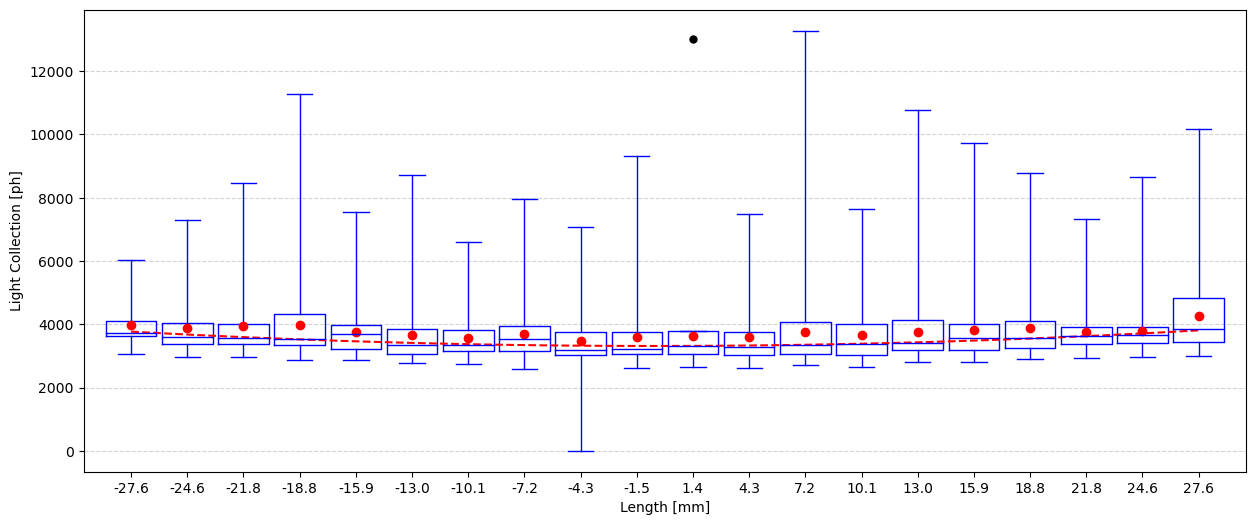

KeyError: 0

In [216]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fnameGC3 = 'EndOfEvent_fPrimaryZ_vs_fLC_box_GC3__quartile_data'
fnameNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_FL_375x3_quartile_data'

folder = 'CSV/'
data = pd.read_csv(folder + fnameGC3 + '.csv')

# Calculate the box positions
data['Position'] = (data['Range Max'] + data['Range Min']) / 2 * 1000

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Set the y-axis limits
#ax.set_ylim(3000, 5000)

# Create boxplots for each row
box_data = [data.loc[i, ['Min','Lower Quartile', 'Median', 'Upper Quartile','Max']].values.tolist()
#box_data = [[3051.5, 3614.0, 3740.0, 4114.0, 6041.0]
            for i in range(len(data))]
print(box_data)
box_positions = data['Position'].tolist()
box_width = (29 * 2) * 0.9 / len(data)# Increase the range of the whiskers to include outliers
whis_value = 10.0  # Set the box width dynamically

boxplot = ax.boxplot(box_data, positions=box_positions, widths=box_width,
                     patch_artist=False,
                     whiskerprops=dict(color='blue'),
                     capprops=dict(color='blue'),
                     medianprops=dict(color='blue'),
                     flierprops=dict(marker='o', markersize=5, markerfacecolor='black', markeredgecolor='black'),
                    whis=whis_value)


# Set the x-axis limits
ax.set_xlim(-30, 30)

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Box Plot')

# Add a parabolic fit to the mean values
x_fit = np.linspace(min(box_positions), max(box_positions), 100)
y_fit = np.polyval(np.polyfit(box_positions, data['Median'], 2), x_fit)
ax.plot(x_fit, y_fit, color='red', linestyle='--')

# Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')

# Calculate the mean of the boxes
mean_values = data['Mean'].to_list()

# Add the 'Mean' data to the plot
ax.plot(box_positions, mean_values, color='red', marker='o', linestyle='', linewidth=1, label='Mean')

# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')

# Customize the color of all boxes
for box in boxplot['boxes']:
    box.set_color('blue')

# Remove the title
ax.set_title('')
# Round the x-axis tick labels to the first decimal place
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
# Save the figure as a PDF
output_filename = 'CSV/GC3.pdf'
plt.savefig(output_filename, format='pdf')

# Show the plot
plt.show()


In [ ]:
def plot_boxplot(folder,file_path,fig,ax,colorbox,colorfit):

    data = pd.read_csv(folder+fname+'.csv')
    # Calculate the box positions
    data['Position'] = (data['Range Max'] + data['Range Min']) / 2*1000
    data['Position'] 

    # Create boxplots for each row
    box_data = [data.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
                for i in range(len(data))]
    box_positions = data['Position'].tolist()
    box_width = (29 * 2)*0.9 / len(data)  # Set the box width dynamically

    boxplot = ax.boxplot(box_data, positions=box_positions, widths=box_width, 
    patch_artist=False,  # Set patch_artist to False
                         whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                         medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                         markerfacecolor='black'))

    # Set the x-axis limits
    ax.set_xlim(-30, 30)


    # Add labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Box Plot')

    # Add a parabolic fit to the mean values
    x_fit = np.linspace(min(box_positions), max(box_positions), 100)
    y_fit = np.polyval(np.polyfit(box_positions, data['Median'], 2), x_fit)
    ax.plot(x_fit, y_fit, color='red', linestyle='--')

    # Add a parabolic fit to the mean values
    #x_fit_mean = np.linspace(min(box_positions), max(box_positions), 100)
    #y_fit_mean = np.polyval(np.polyfit(box_positions, data['Mean'], 2), x_fit_mean)
    #ax.plot(x_fit_mean, y_fit_mean, color='green', linestyle='--')

    # Round the x-axis tick labels to the first decimal place
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))


        # Add a grid
    ax.grid(True, axis='y', linestyle='--', color='lightgray')


    # Calculate the mean of the boxes
    mean_values = data['Mean'].to_list()

    # Add the 'Mean' data to the plot
    ax.plot(box_positions, mean_values, color='red', marker='o', linestyle='', linewidth=1, label='Mean')

    # Add labels
    ax.set_xlabel('Length [mm]')
    ax.set_ylabel('Light Collection [ph]')

    # Customize the color of all boxes
    for box in boxplot['boxes']:
        box.set_color('blue')

    # Remove the title
    ax.set_title('')

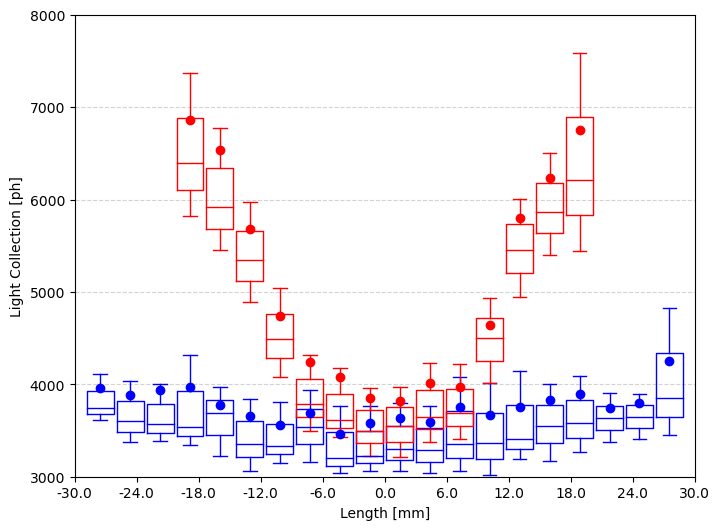

In [185]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

folder = 'CSV/'
fnameGC3 = 'EndOfEvent_fPrimaryZ_vs_fLC_box_GC3_quartile_data'
fnameNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_FL_375x3_quartile_data'

# Read CSV1
fname1 = fnameGC3+'.csv'
data1 = pd.read_csv(folder + fname1)

# Read CSV2
fname2 = fnameNSGA+'.csv'
data2 = pd.read_csv(folder + fname2)

# Calculate the box positions
data1['Position'] = (data1['Range Max'] + data1['Range Min']) / 2 * 1000
data2['Position'] = (data2['Range Max'] + data2['Range Min']) / 2 * 1000

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Set the y-axis limits
ax.set_ylim(3000, 8000)

# Create boxplots for CSV1
box_data1 = [data1.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
             for i in range(len(data1))]
box_positions1 = data1['Position'].tolist()
box_width = (29 * 2) * 0.9 / len(data1)  # Set the box width dynamically

boxplot1 = ax.boxplot(box_data1, positions=box_positions1, widths=box_width,
                      patch_artist=False,
                      whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                      medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                      markerfacecolor='black'))

# Create boxplots for CSV2
box_data2 = [data2.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
             for i in range(len(data2))]
box_positions2 = data2['Position'].tolist()

boxplot2 = ax.boxplot(box_data2, positions=box_positions2, widths=box_width,
                      patch_artist=False,
                      whiskerprops=dict(color='red'), capprops=dict(color='red'),
                      medianprops=dict(color='red'), flierprops=dict(marker='o', markersize=5,
                                                                     markerfacecolor='black'))


# Calculate the mean of the boxes
mean_values1 = data1['Mean'].to_list()
# Add the 'Mean' data to the plot
ax.plot(box_positions1, mean_values1, color='blue', marker='o', linestyle='', linewidth=1, label='Mean')
# Calculate the mean of the boxes
mean_values2 = data2['Mean'].to_list()
# Add the 'Mean' data to the plot
ax.plot(box_positions2, mean_values2, color='red', marker='o', linestyle='', linewidth=1, label='Mean')

# Set the x-axis limits
ax.set_xlim(-30, 30)

# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')
    # Customize the color of all boxes
for box in boxplot1['boxes']:
        box.set_color('blue')
for box in boxplot2['boxes']:
        box.set_color('red')

import matplotlib.ticker as mticker

# Set the number of divisions on the x-axis
num_divisions = 10  # Choose the desired number of divisions
ax.xaxis.set_major_locator(mticker.MaxNLocator(num_divisions))

# Display only the first decimal point on the x-axis labels
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')

# Save the figure as a PDF
output_filename = 'CSV/END_GC3.pdf'
plt.savefig(output_filename, format='pdf')

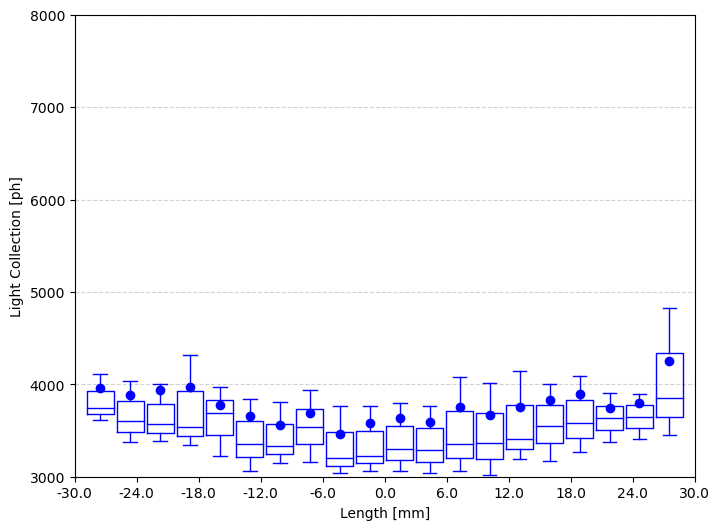

In [186]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

folder = 'CSV/'
fnameGC3 = 'EndOfEvent_fPrimaryZ_vs_fLC_box_GC3_quartile_data'
fnameNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_FL_375x3_quartile_data'

# Read CSV1
fname1 = fnameGC3+'.csv'
data1 = pd.read_csv(folder + fname1)

# Read CSV2
fname2 = fnameNSGA+'.csv'
data2 = pd.read_csv(folder + fname2)

# Calculate the box positions
data1['Position'] = (data1['Range Max'] + data1['Range Min']) / 2 * 1000
data2['Position'] = (data2['Range Max'] + data2['Range Min']) / 2 * 1000

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Set the y-axis limits
ax.set_ylim(3000, 8000)

# Create boxplots for CSV1
box_data1 = [data1.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
             for i in range(len(data1))]
box_positions1 = data1['Position'].tolist()
box_width = (29 * 2) * 0.9 / len(data1)  # Set the box width dynamically

boxplot1 = ax.boxplot(box_data1, positions=box_positions1, widths=box_width,
                      patch_artist=False,
                      whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                      medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                      markerfacecolor='black'))




# Calculate the mean of the boxes
mean_values1 = data1['Mean'].to_list()
# Add the 'Mean' data to the plot
ax.plot(box_positions1, mean_values1, color='blue', marker='o', linestyle='', linewidth=1, label='Mean')


# Set the x-axis limits
ax.set_xlim(-30, 30)

# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')
    # Customize the color of all boxes
for box in boxplot1['boxes']:
        box.set_color('blue')


import matplotlib.ticker as mticker

# Set the number of divisions on the x-axis
num_divisions = 10  # Choose the desired number of divisions
ax.xaxis.set_major_locator(mticker.MaxNLocator(num_divisions))

# Display only the first decimal point on the x-axis labels
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')

# Save the figure as a PDF
output_filename = 'CSV/END_GC3.pdf'
plt.savefig(output_filename, format='pdf')

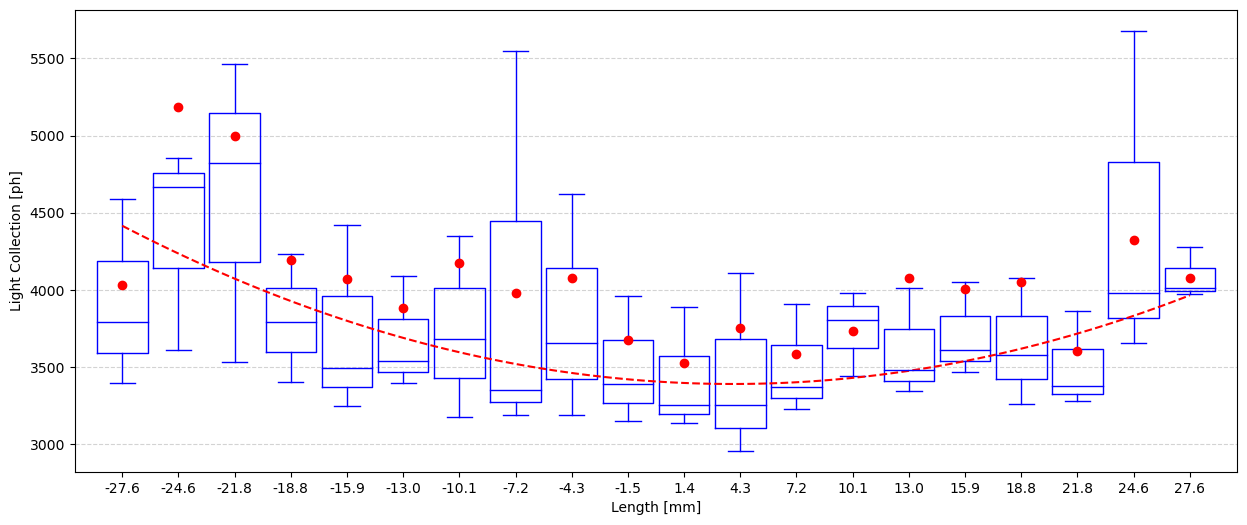

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file into a DataFrame
fname='EndOfEvent_fPrimaryZ_vs_fLC_box_FL_375x3_quartile_data'
fname1='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'

folder='CSV/'

fig, ax = plt.subplots(figsize=(15, 6))
plot_boxplot(folder,fname,fig,ax,'blue','blue')
#plot_boxplot(folder,fname,fig,ax,'blue','blue')

plt.show()
#plt.savefig(folder +fname+'.pdf')


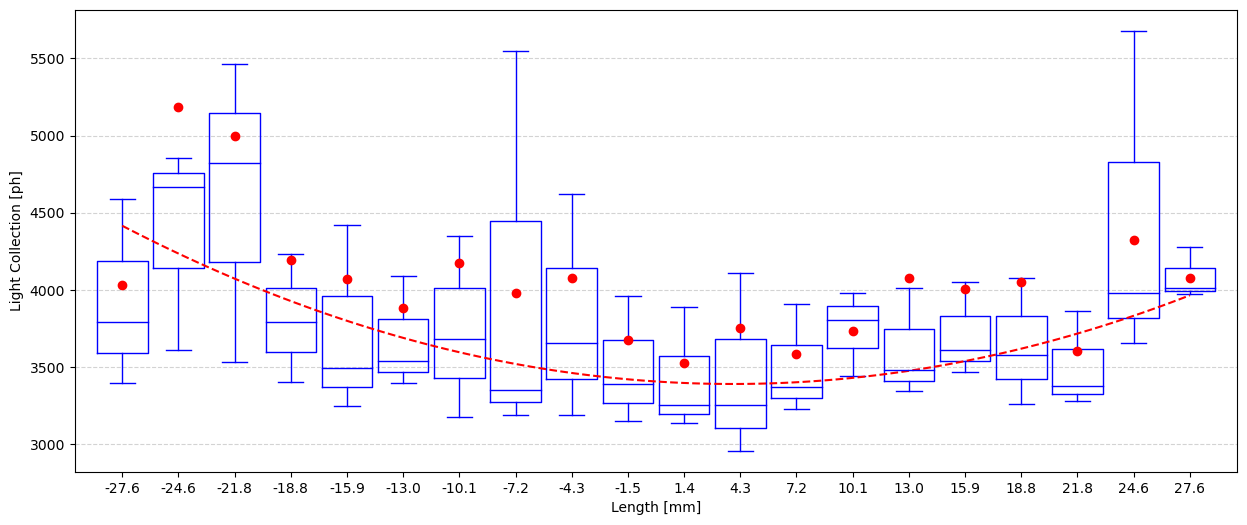

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file into a DataFrame
fname1='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'

folder='CSV/'

fig2, ax2 = plt.subplots(figsize=(15, 6))
plot_boxplot(folder,fname1,fig2,ax2,'blue','blue')
#plot_boxplot(folder,fname,fig,ax,'blue','blue')

plt.show()
#plt.savefig(folder +fname+'.pdf')

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_boxplot(folder, file_paths, fig, ax, colorbox, colorfit):
    all_data = []
    all_positions = []

    for file_path in file_paths:
        data = pd.read_csv(folder + file_path + '.csv')
        data['Position'] = (data['Range Max'] + data['Range Min']) / 2 * 1000
        all_positions.extend(data['Position'].tolist())

        box_data = [data.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
                    for i in range(len(data))]
        all_data.extend(box_data)

    box_width = (29 * 2) * 0.9 / len(all_data)  # Set the box width dynamically

    boxplot = ax.boxplot(all_data, positions=all_positions, widths=box_width,
                         patch_artist=False,  # Set patch_artist to False
                         whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                         medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                         markerfacecolor='black'))

    ax.set_xlim(-30, 30)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Box Plot')

    x_fit = np.linspace(min(all_positions), max(all_positions), 100)

    for file_path in file_paths:
        data = pd.read_csv(folder + file_path + '.csv')
        y_fit = np.polyval(np.polyfit(data['Position'], data['Median'], 2), x_fit)
        ax.plot(x_fit, y_fit, color='red', linestyle='--')

    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
    ax.grid(True, axis='y', linestyle='--', color='lightgray')

    for box in boxplot['boxes']:
        box.set_color('blue')

    ax.set_xlabel('Length [mm]')
    ax.set_ylabel('Light Collection [ph]')

    mean_values = []

    for file_path in file_paths:
        data = pd.read_csv(folder + file_path + '.csv')
        mean_values.extend(data['Mean'].tolist())

    ax.plot(all_positions, mean_values, color='red', marker='o', linestyle='', linewidth=1, label='Mean')

    ax.set_title('')


TypeError: plot_boxplot() missing 1 required positional argument: 'colorfit'

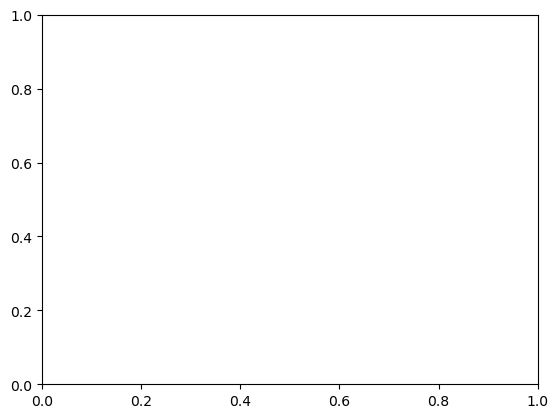

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file into a DataFrame
# Read the CSV file into a DataFrame
fnameGC3='EndOfEvent_fPrimaryZ_vs_fLC_box_GC3_quartile_data'
fnameNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
folder='CSV/'

fig, ax = plt.subplots()

plot_boxplot(folder, [fnameGC3,], fig, ax, 'blue', 'blue')
plot_boxplot(folder, [fnameNSGA], fig, ax, 'blue', 'blue')

plt.show()